# Dados Metereológicos Diários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path

### Construção de um dataframe com as colunas que representam as variáveis 

In [2]:
#caminho do arquivo csv

file_path = Path(
    '../Dados/Dados-Metereologicos/Horarios/' +\
     'dados_A320_H_A_2008-01-01_2013-12-31.csv'
     ) 

#importando o arquivo csv como um Dataframe

df = pd.read_csv(file_path, 
                 header=9, #linha do cabeçalho
                 sep=';',  #separador
                 usecols= #colunas
                 ['Data Medicao', 
                  'Hora Medicao', 
                  'PRECIPITACAO TOTAL, HORARIO(mm)',
                  'RADIACAO GLOBAL(Kj/m²)',
                  'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)',
                  'TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)',
                  'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)',
                  'VENTO, RAJADA MAXIMA(m/s)',
                  'VENTO, VELOCIDADE HORARIA(m/s)' ]
                 )
df.head()

,Data Medicao,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
0,2008-01-01,0,0,"-3,54","25,9","26,1","25,9",8,"2,5"
1,2008-01-01,100,0,"-3,54","25,7",26,"25,7","8,6","2,2"
2,2008-01-01,200,0,"-3,54","25,7","25,9","25,6","7,5","2,9"
3,2008-01-01,300,0,"-3,54","25,5","25,7","25,5","6,1","2,6"
4,2008-01-01,400,0,"-3,54","25,4","25,5","25,4","5,6","1,6"


No momento de importação o pandas reconheceu a hora de medição como número inteiro, por isso é necessário ajustar as horas de medição para se tornarem um padrão reconhecido pelo datetime

In [3]:
#ajustando as horas de medição para se tornarem um padrão reconhecido pelo datetime

df['Hora Medicao'] = (df['Hora Medicao']//100).astype(str)+':'+'00' 
df.head()

,Data Medicao,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
0,2008-01-01,0:00,0,"-3,54","25,9","26,1","25,9",8,"2,5"
1,2008-01-01,1:00,0,"-3,54","25,7",26,"25,7","8,6","2,2"
2,2008-01-01,2:00,0,"-3,54","25,7","25,9","25,6","7,5","2,9"
3,2008-01-01,3:00,0,"-3,54","25,5","25,7","25,5","6,1","2,6"
4,2008-01-01,4:00,0,"-3,54","25,4","25,5","25,4","5,6","1,6"


In [4]:
#concatenando a hora com a data de medição e retirando a coluna das horas

df['Data Medicao'] = df['Data Medicao'] + ' ' + df['Hora Medicao'].astype(str)
df.drop('Hora Medicao', axis=1, inplace=True)
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
0,2008-01-01 0:00,0,"-3,54","25,9","26,1","25,9",8,"2,5"
1,2008-01-01 1:00,0,"-3,54","25,7",26,"25,7","8,6","2,2"
2,2008-01-01 2:00,0,"-3,54","25,7","25,9","25,6","7,5","2,9"
3,2008-01-01 3:00,0,"-3,54","25,5","25,7","25,5","6,1","2,6"
4,2008-01-01 4:00,0,"-3,54","25,4","25,5","25,4","5,6","1,6"


A coluna "Data Medicao" é composta por strings, então há a necessidade de transformar para Datetime e logo após transformar essa coluna, em uma coluna de índices

In [5]:
#transformando os valores da coluna em datetime

df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
0,2008-01-01 00:00:00,0,"-3,54","25,9","26,1","25,9",8,"2,5"
1,2008-01-01 01:00:00,0,"-3,54","25,7",26,"25,7","8,6","2,2"
2,2008-01-01 02:00:00,0,"-3,54","25,7","25,9","25,6","7,5","2,9"
3,2008-01-01 03:00:00,0,"-3,54","25,5","25,7","25,5","6,1","2,6"
4,2008-01-01 04:00:00,0,"-3,54","25,4","25,5","25,4","5,6","1,6"


In [6]:
#transformando a coluna das datas nos índices do dataframe

df.set_index('Data Medicao', inplace=True)
df.head()

,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,,,,
2008-01-01 00:00:00,0,"-3,54","25,9","26,1","25,9",8,"2,5"
2008-01-01 01:00:00,0,"-3,54","25,7",26,"25,7","8,6","2,2"
2008-01-01 02:00:00,0,"-3,54","25,7","25,9","25,6","7,5","2,9"
2008-01-01 03:00:00,0,"-3,54","25,5","25,7","25,5","6,1","2,6"
2008-01-01 04:00:00,0,"-3,54","25,4","25,5","25,4","5,6","1,6"


Podemos ainda perceber que apesar de estarem representando valores numéricos cada célula é uma string, que utiliza vírgula para representar os número racionais. Porém é necessário que utilizemos float para realizar os plots e para transformar strings em floats é necessário que sejam utilizados pontos ao invés de vírgulas.

In [7]:
#transformando os dados de string para float


df['PRECIPITACAO TOTAL, HORARIO(mm)'] = \
    df['PRECIPITACAO TOTAL, HORARIO(mm)'].str.replace(',','.').astype(float)


df['RADIACAO GLOBAL(Kj/m²)'] = \
    df['RADIACAO GLOBAL(Kj/m²)'].str.replace(',','.').astype(float)


df['TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'] =\
    df['TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'].str.replace(',','.').astype(float)
    
df['TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)'] =\
    df['TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)'].str.replace(',','.').astype(float)
    
df['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'] =\
    df['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'].str.replace(',','.').astype(float)


df['VENTO, RAJADA MAXIMA(m/s)'] = \
    df['VENTO, RAJADA MAXIMA(m/s)'].str.replace(',','.').astype(float)


df['VENTO, VELOCIDADE HORARIA(m/s)' ] =\
    df['VENTO, VELOCIDADE HORARIA(m/s)'].str.replace(',','.').astype(float)

df.head()

,"PRECIPITACAO TOTAL, HORARIO(mm)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),"VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,,,,
2008-01-01 00:00:00,0.0,-3.54,25.9,26.1,25.9,8.0,2.5
2008-01-01 01:00:00,0.0,-3.54,25.7,26.0,25.7,8.6,2.2
2008-01-01 02:00:00,0.0,-3.54,25.7,25.9,25.6,7.5,2.9
2008-01-01 03:00:00,0.0,-3.54,25.5,25.7,25.5,6.1,2.6
2008-01-01 04:00:00,0.0,-3.54,25.4,25.5,25.4,5.6,1.6


### Divisão em dataframes para cada variável contendo os dados diários

Nessa próxima parte do código o dataframe é dividido entre dataframes menores, contendo agora dados diários que envolvem, cada um, exclusivamente as variáveis de:

    - Temperatura;
    - Chuva;
    - Vento;
    - Radiação Solar.

#### Temperatura

In [8]:
df_temp = pd.DataFrame(columns=
                       ['TEMPERATURA MÉDIA DO AR DIARIA(°C)',
                        'TEMPERATURA MINIMA DIARIA (°C)',
                        'TEMPERATURA MAXIMA DIARIA (°C)'
                           ]
                       )

#A temperatura do ar diária será a média das temperaturas horárias

df_temp['TEMPERATURA MÉDIA DO AR DIARIA(°C)'] =\
    df['TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'].resample('D').mean()

#A temperatura mínima diária será a menor temperatura das mínimas temperaturas horárias

df_temp['TEMPERATURA MINIMA DIARIA (°C)'] =\
    df['TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)'].resample('D').min()

#A temperatura máxima diária será a maior temperatura das máximas temperaturas horárias

df_temp['TEMPERATURA MAXIMA DIARIA (°C)'] =\
    df['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'].resample('D').max()

df_temp.head()

,TEMPERATURA MÉDIA DO AR DIARIA(°C),TEMPERATURA MINIMA DIARIA (°C),TEMPERATURA MAXIMA DIARIA (°C)
Data Medicao,,,
2008-01-01,26.916667,23.1,30.7
2008-01-02,27.045833,25.1,30.6
2008-01-03,27.166667,24.4,30.7
2008-01-04,27.379167,25.8,30.4
2008-01-05,27.254167,25.5,30.4


#### Chuvas

In [9]:
#Criando o dataframe dos índices de chuva com o nome da coluna desejada
df_chuva = pd.DataFrame(columns=['PRECIPITACAO TOTAL, DIARIA(mm)'])

#A coluna Precipitação Total diária é a soma das precipitações horárias
df_chuva['PRECIPITACAO TOTAL, DIARIA(mm)'] = df['PRECIPITACAO TOTAL, HORARIO(mm)'].resample('D').sum()
df_chuva.head()

,"PRECIPITACAO TOTAL, DIARIA(mm)"
Data Medicao,
2008-01-01,0.0
2008-01-02,0.0
2008-01-03,0.0
2008-01-04,0.2
2008-01-05,0.0


#### Vento

In [10]:
#Criando o dataframe das velocidades do vento com o nome da coluna desejada
df_vento = pd.DataFrame(columns=
                        ['VELOCIDADE MÉDIA DIÁRIA DO VENTO (m/s)',
                         'RAJADA MAXIMA DIARIA DO VENTO (m/s)']
                        )

#A velocidade diária do vento será a média das velocidades horárias
df_vento['VELOCIDADE MÉDIA DIÁRIA DO VENTO (m/s)' ] =\
    df['VENTO, VELOCIDADE HORARIA(m/s)'].resample('D').mean()

#A rajada máxima diária será a máxima rajada horária
df_vento['RAJADA MAXIMA DIARIA DO VENTO (m/s)'] =\
    df['VENTO, RAJADA MAXIMA(m/s)'].resample('D').max()

df_vento.head()

,VELOCIDADE MÉDIA DIÁRIA DO VENTO (m/s),RAJADA MAXIMA DIARIA DO VENTO (m/s)
Data Medicao,,
2008-01-01,2.812500,10.8
2008-01-02,2.770833,8.8
2008-01-03,3.670833,11.4
2008-01-04,3.300000,11.5
2008-01-05,2.841667,10.2


#### Radiação Solar

In [11]:
df_rads = pd.DataFrame(columns=['RADIACAO GLOBAL MÉDIA DIÁRIA (Kj/m²)'])

#A radiação solar diária será a média das radiações soláres horárias
df_rads['RADIACAO GLOBAL MÉDIA DIÁRIA (Kj/m²)'] = df['RADIACAO GLOBAL(Kj/m²)'].resample('D').mean()

df_rads.head()

,RADIACAO GLOBAL MÉDIA DIÁRIA (Kj/m²)
Data Medicao,
2008-01-01,1122.721625
2008-01-02,998.177125
2008-01-03,1033.692875
2008-01-04,899.273917
2008-01-05,1005.617375


### Divisão dos dataframes diários para cada ano

In [12]:
#dividindo os dados da temperatura por anos
df_temp_08 = df_temp.loc[df_temp.index.year == 2008]
df_temp_09 = df_temp.loc[df_temp.index.year == 2009]
df_temp_10 = df_temp.loc[df_temp.index.year == 2010]
df_temp_11 = df_temp.loc[df_temp.index.year == 2011]
df_temp_12 = df_temp.loc[df_temp.index.year == 2012]
df_temp_13 = df_temp.loc[df_temp.index.year == 2013]


#dividindo os dados da chuva por anos
df_chuva_08 = df_chuva.loc[df_chuva.index.year == 2008]
df_chuva_09 = df_chuva.loc[df_chuva.index.year == 2009]
df_chuva_10 = df_chuva.loc[df_chuva.index.year == 2010]
df_chuva_11 = df_chuva.loc[df_chuva.index.year == 2011]
df_chuva_12 = df_chuva.loc[df_chuva.index.year == 2012]
df_chuva_13 = df_chuva.loc[df_chuva.index.year == 2013]


#dividindo os dados do vento por anos
df_vento_08 = df_vento.loc[df_vento.index.year == 2008]
df_vento_09 = df_vento.loc[df_vento.index.year == 2009]
df_vento_10 = df_vento.loc[df_vento.index.year == 2010]
df_vento_11 = df_vento.loc[df_vento.index.year == 2011]
df_vento_12 = df_vento.loc[df_vento.index.year == 2012]
df_vento_13 = df_vento.loc[df_vento.index.year == 2013]


#dividindo os dados da radiação solar por anos
df_rads_08 = df_rads.loc[df_rads.index.year == 2008]
df_rads_09 = df_rads.loc[df_rads.index.year == 2009]
df_rads_10 = df_rads.loc[df_rads.index.year == 2010]
df_rads_11 = df_rads.loc[df_rads.index.year == 2011]
df_rads_12 = df_rads.loc[df_rads.index.year == 2012]
df_rads_13 = df_rads.loc[df_rads.index.year == 2013]

### Gráficos por variável

In [13]:
# Configurações globais dos gráficos, independente da variável
label_x = 'dias'
date = mdates.MonthLocator()   # every year
days = mdates.DayLocator()  # every month
fmt = mdates.DateFormatter('%d-%m')

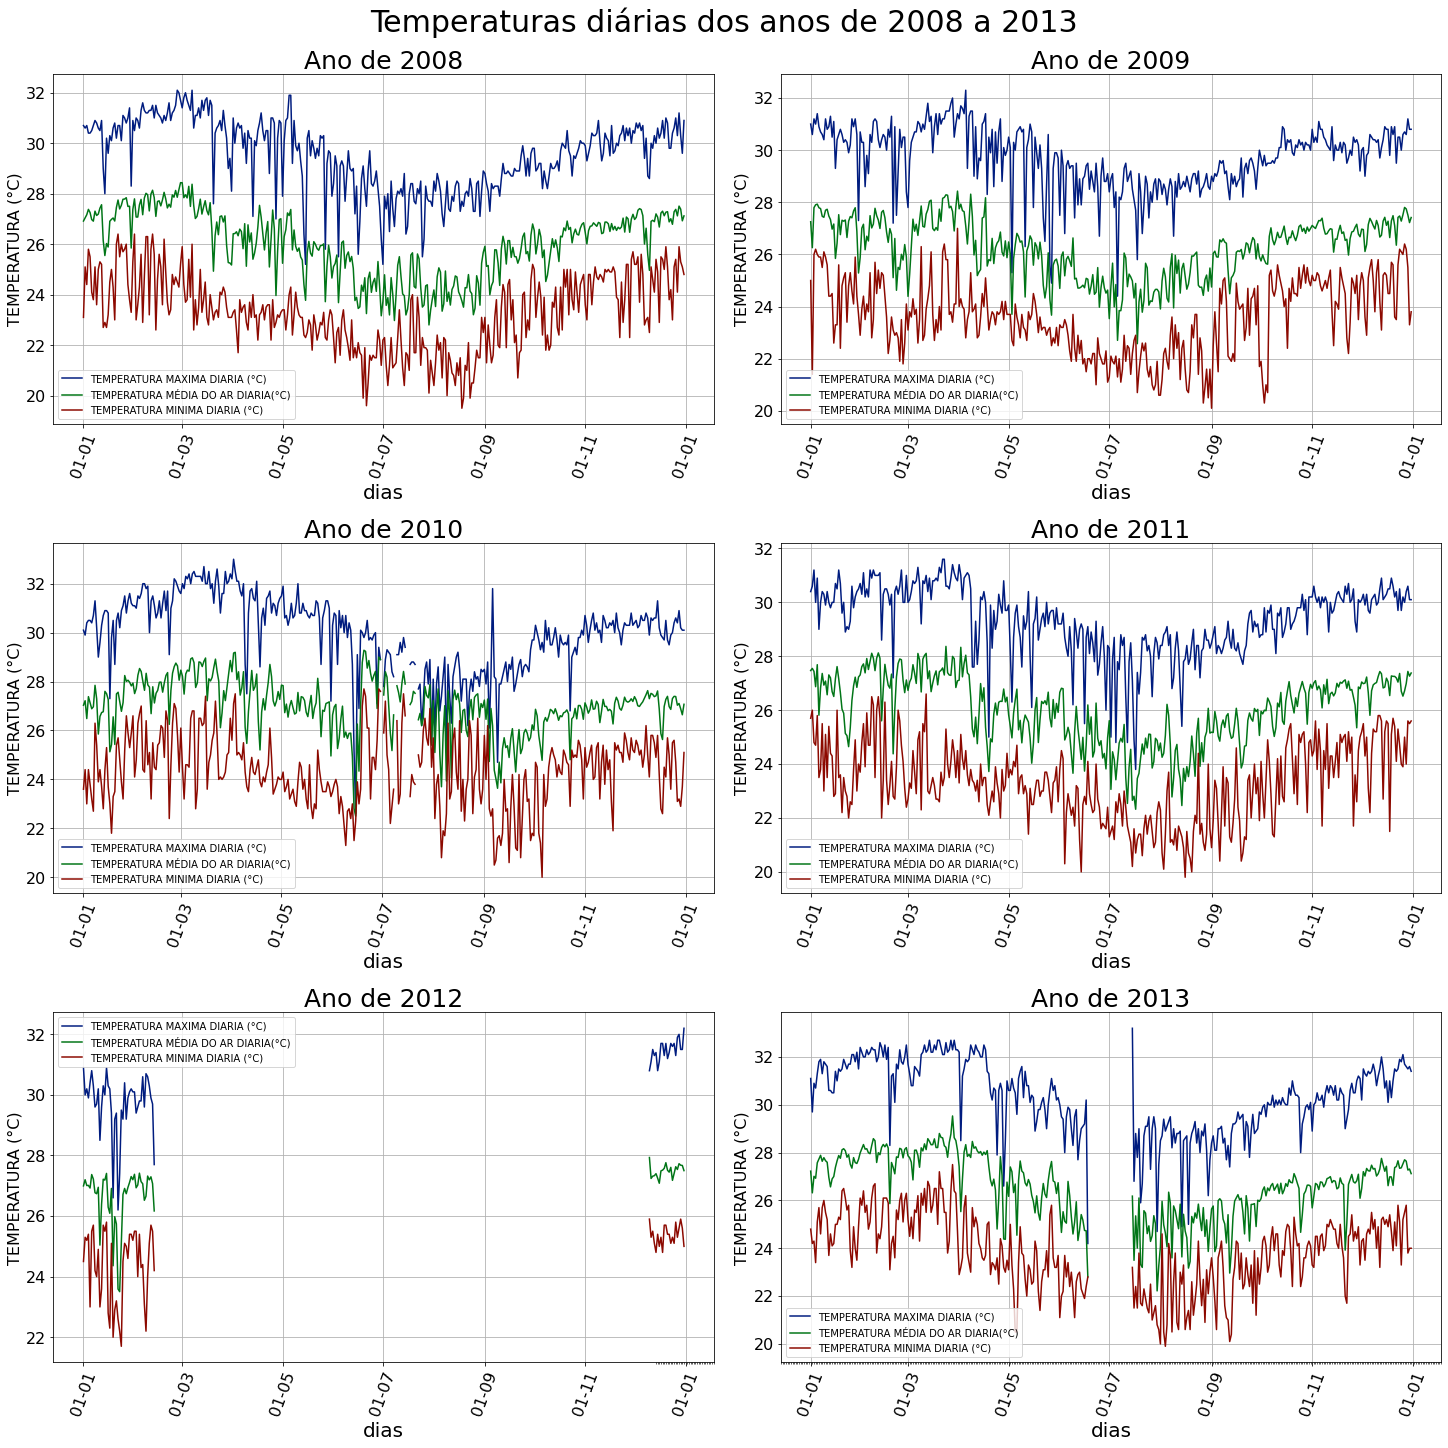

In [14]:
#Gráfico das temperaturas

plt.style.use('seaborn-dark-palette')

fig1, f1_axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,20))

fig1.suptitle('Temperaturas diárias dos anos de 2008 a 2013',size=30)


#definindo uma lista com o nome de variáveis para facilitar possíveis alterações
col_names_temp = ['TEMPERATURA MAXIMA DIARIA (°C)',
                  'TEMPERATURA MÉDIA DO AR DIARIA(°C)',
                  'TEMPERATURA MINIMA DIARIA (°C)']

#definindo variáveis sendo as labels dos eixos 
label_y_temp = 'TEMPERATURA (°C)'

# plotando os dados de temperatura 
for i in range(3):
    #os plots são contados de cima para baixo, da esquerda para direta.
    
    # plot 1
    f1_axes[0,0].plot(df_temp_08[col_names_temp[i]], label = col_names_temp[i])

    # plot 2
    f1_axes[0,1].plot(df_temp_09[col_names_temp[i]], label = col_names_temp[i])
    
    # plot 3
    f1_axes[1,0].plot(df_temp_10[col_names_temp[i]], label = col_names_temp[i])
    
    #plot 4
    f1_axes[1,1].plot(df_temp_11[col_names_temp[i]], label = col_names_temp[i])
    
    #plot 5
    f1_axes[2,0].plot(df_temp_12[col_names_temp[i]], label = col_names_temp[i])
    
    #plot 6
    f1_axes[2,1].plot(df_temp_13[col_names_temp[i]], label = col_names_temp[i])

ano_inicial = 2008
for i in range(3):
    for j in range(2):
        f1_axes[i,j].set_title(f'Ano de {ano_inicial}', size=25)
        f1_axes[i,j].xaxis.set_major_formatter(fmt)
        f1_axes[i,j].xaxis.set_minor_locator(days)
        
        f1_axes[i,j].set_xlabel(label_x, size=20)
        f1_axes[i,j].set_ylabel(label_y_temp, size=16)

        f1_axes[i,j].tick_params(axis='x', labelsize=16, rotation=70)
        f1_axes[i,j].tick_params(axis='y', labelsize=16)

        f1_axes[i,j].grid()
        f1_axes[i,j].legend()
        ano_inicial = ano_inicial + 1

    


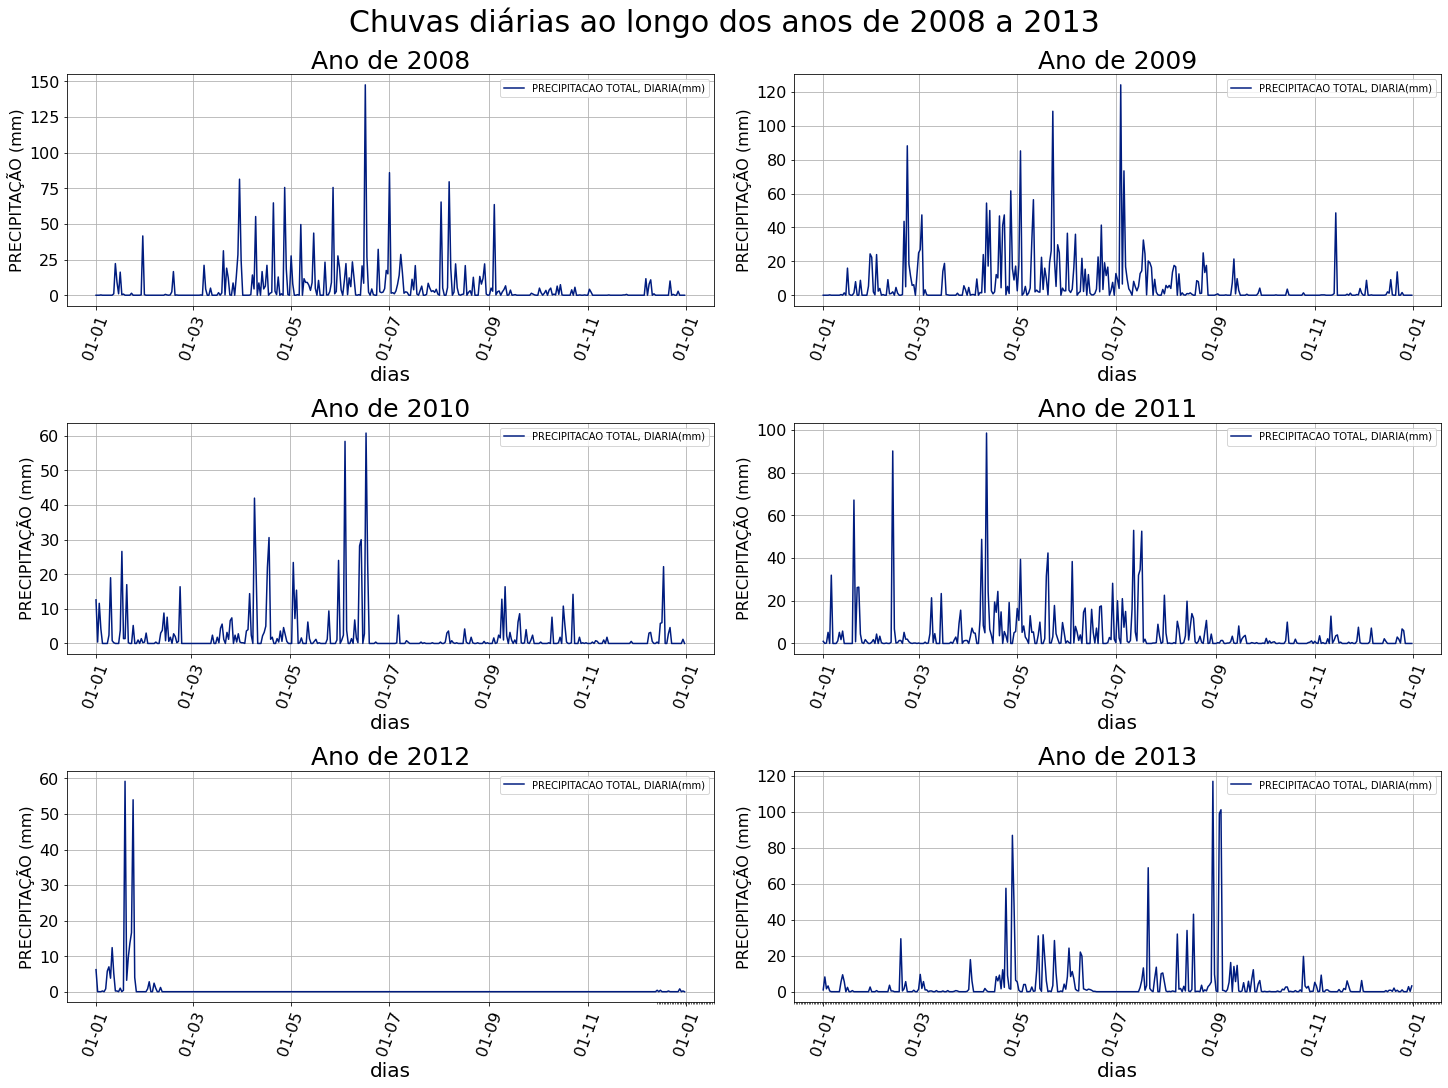

In [15]:
#Gráfico das chuvas

fig2, f2_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(20,15))

fig2.suptitle('Chuvas diárias ao longo dos anos de 2008 a 2013',size=30)

#definindo uma variável que armazene o nome da coluna desejada  
col_name_chuva = 'PRECIPITACAO TOTAL, DIARIA(mm)'

#definindo o label do eixo y:
label_y_chuva = 'PRECIPITAÇÃO (mm)'

#primeiro plot
f2_axes[0,0].plot(df_chuva_08[col_name_chuva], label = col_name_chuva)

#segundo plot
f2_axes[0,1].plot(df_chuva_09[col_name_chuva], label = col_name_chuva)

#terceiro plot
f2_axes[1,0].plot(df_chuva_10[col_name_chuva], label = col_name_chuva)

#quarto plot
f2_axes[1,1].plot(df_chuva_11[col_name_chuva], label = col_name_chuva)

#quinto plot
f2_axes[2,0].plot(df_chuva_12[col_name_chuva], label = col_name_chuva)

#sexto plot
f2_axes[2,1].plot(df_chuva_13[col_name_chuva], label = col_name_chuva)

ano_inicial = 2008
for i in range(3):
    for j in range(2):
        f2_axes[i,j].set_title(f'Ano de {ano_inicial}', size=25)
        f2_axes[i,j].xaxis.set_major_formatter(fmt)
        f2_axes[i,j].xaxis.set_minor_locator(days)
        
        f2_axes[i,j].set_xlabel(label_x, size=20)
        f2_axes[i,j].set_ylabel(label_y_chuva, size=16)

        f2_axes[i,j].tick_params(axis='x', labelsize=16, rotation=70)
        f2_axes[i,j].tick_params(axis='y', labelsize=16)

        f2_axes[i,j].grid()
        f2_axes[i,j].legend()
        ano_inicial = ano_inicial + 1 

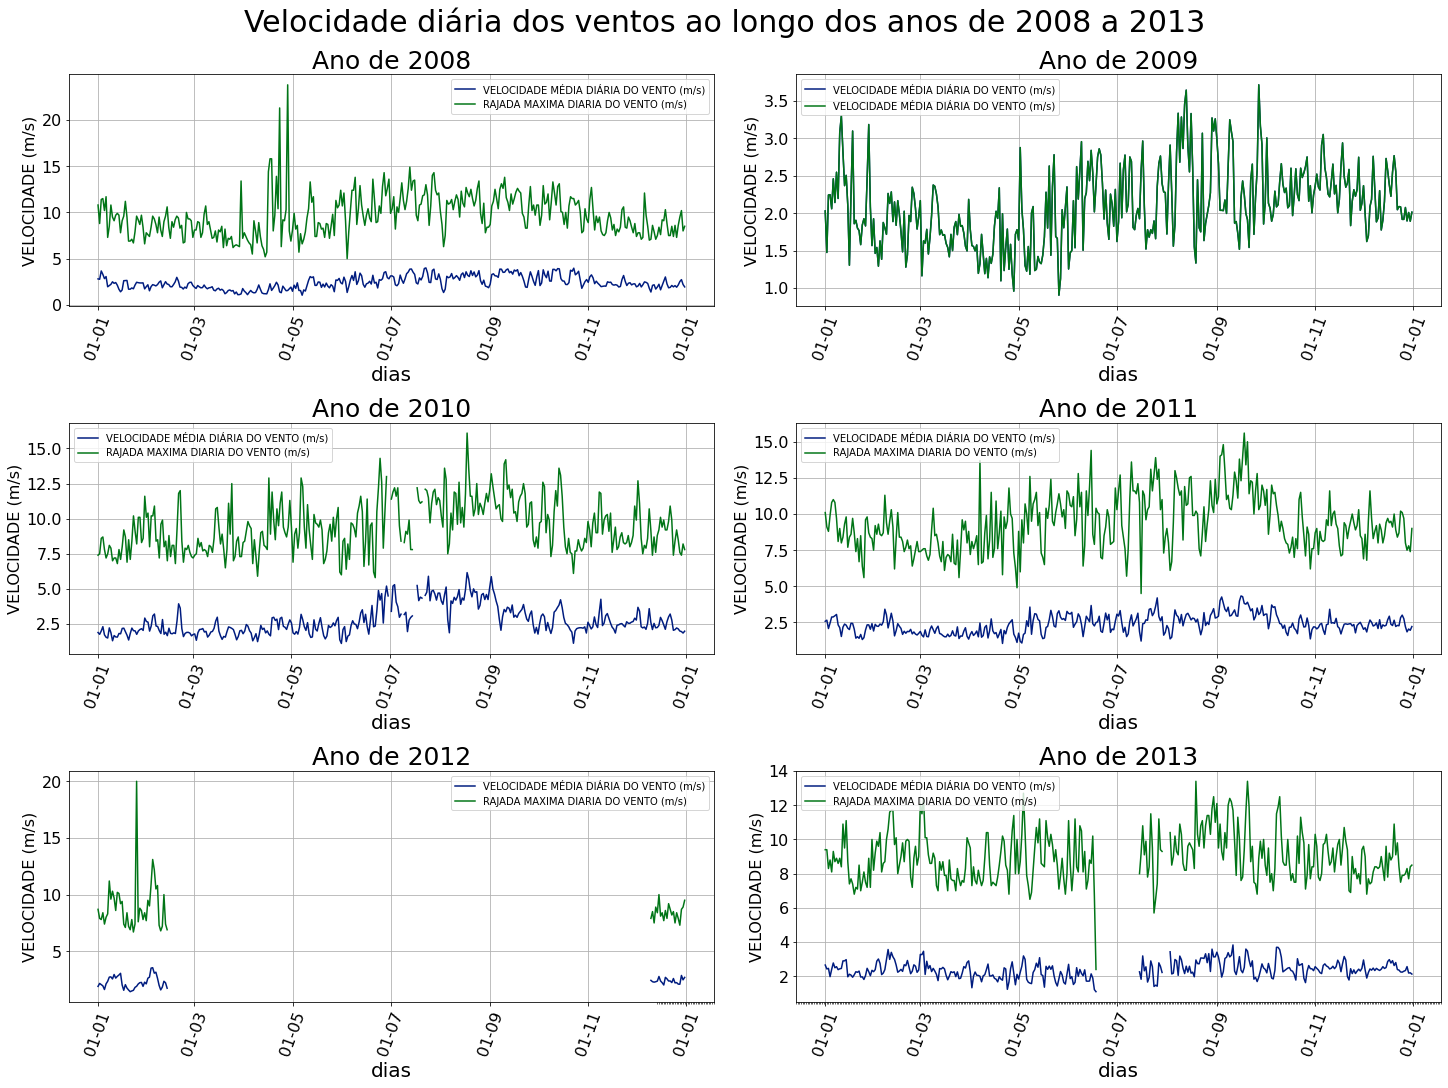

In [16]:
#Gráficos da velocidade do vento
fig3, f3_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(20,15))

fig3.suptitle('Velocidade diária dos ventos ao longo dos anos de 2008 a 2013',size=30)

#salvando em uma variável o nome das colunas do df vento
col_names_vento = ['VELOCIDADE MÉDIA DIÁRIA DO VENTO (m/s)', 
                   'RAJADA MAXIMA DIARIA DO VENTO (m/s)']

#definindo o label do eixo y:
label_y_vento = 'VELOCIDADE (m/s)'

#realizando o plot
for i in range(2):
    #primeiro plot
    f3_axes[0,0].plot(df_vento_08[col_names_vento[i]], label = col_names_vento[i])
    
    #segundo plot
    f3_axes[0,1].plot(df_vento_09[col_names_vento[i]], label = col_names_vento[i])
    
    #terceiro plot
    f3_axes[1,0].plot(df_vento_10[col_names_vento[i]], label = col_names_vento[i])
    
    #quarto plot
    f3_axes[1,1].plot(df_vento_11[col_names_vento[i]], label = col_names_vento[i])
    
    #quinto plot
    f3_axes[2,0].plot(df_vento_12[col_names_vento[i]], label = col_names_vento[i])
    
    #sexto plot
    f3_axes[2,1].plot(df_vento_13[col_names_vento[i]], label = col_names_vento[i])

#configurando os gráficos
ano_inicial = 2008
for i in range(3):
    for j in range(2):
        f3_axes[i,j].set_title(f'Ano de {ano_inicial}', size=25)
        f3_axes[i,j].xaxis.set_major_formatter(fmt)
        f3_axes[i,j].xaxis.set_minor_locator(days)
        
        f3_axes[i,j].set_xlabel(label_x, size=20)
        f3_axes[i,j].set_ylabel(label_y_vento, size=16)

        f3_axes[i,j].tick_params(axis='x', labelsize=16, rotation=70)
        f3_axes[i,j].tick_params(axis='y', labelsize=16)

        f3_axes[i,j].grid()
        f3_axes[i,j].legend()
        ano_inicial = ano_inicial + 1 


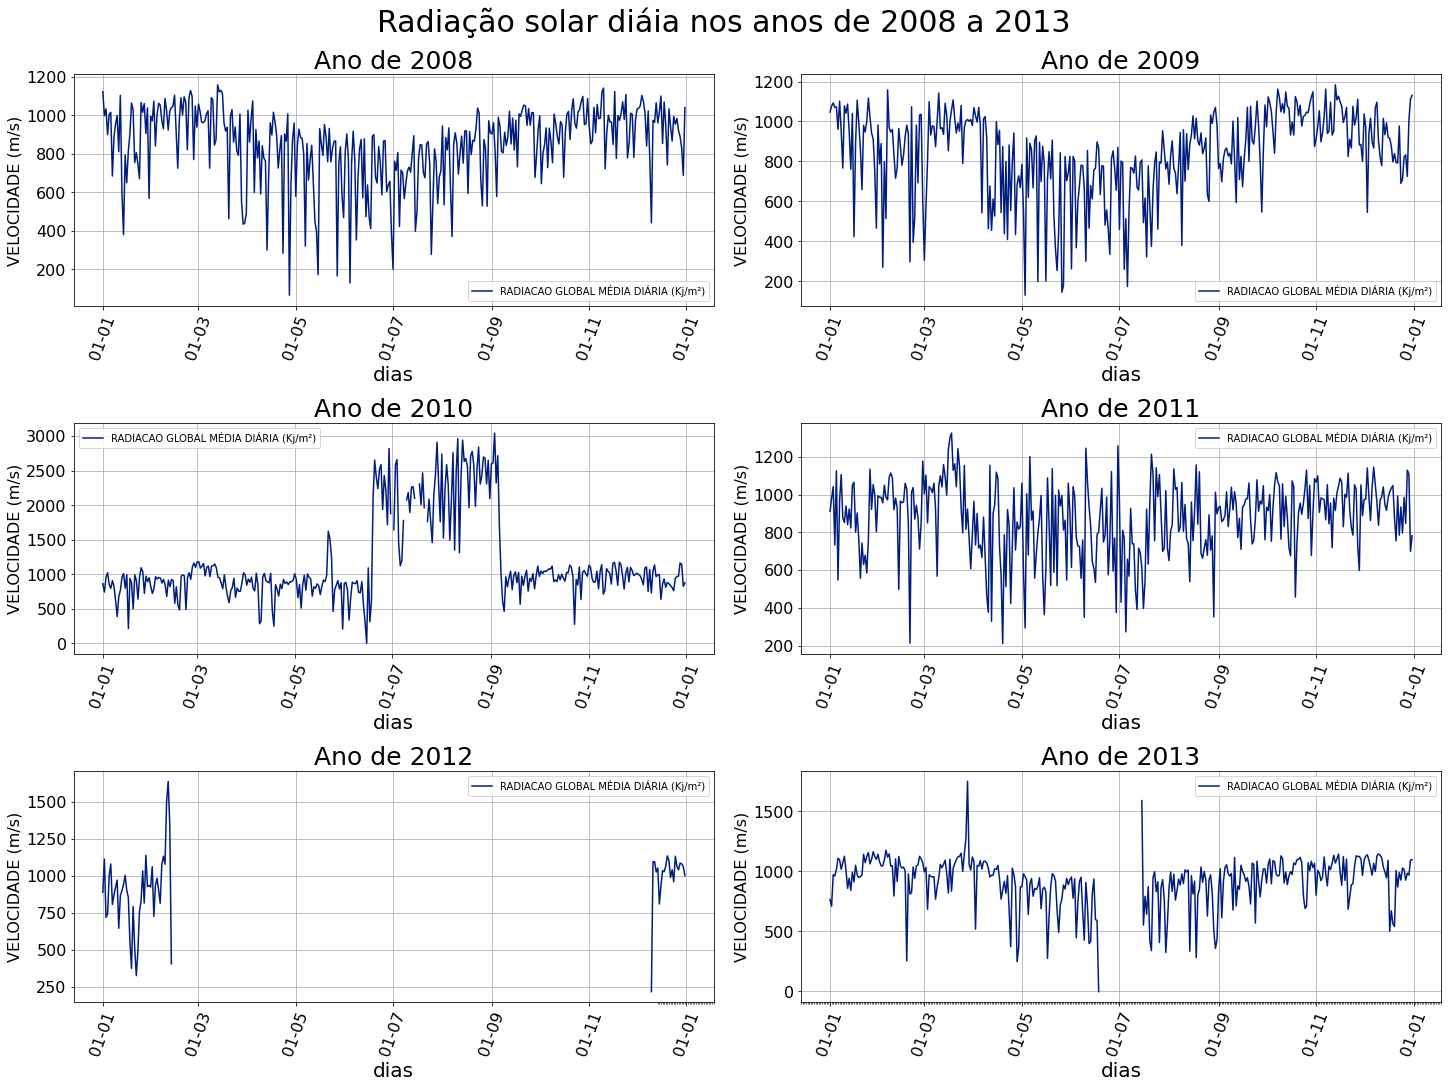

In [21]:
#Gráficos da radiação solar 
fig4, f4_axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(20,15))

fig4.suptitle('Radiação solar diáia nos anos de 2008 a 2013',size=30)

#salvando em uma variável o nome das colunas do df vento
col_names_rads = 'RADIACAO GLOBAL MÉDIA DIÁRIA (Kj/m²)'

#definindo o label do eixo y:
label_y_rads = 'Radiação Solar Média (Kj/m)'

#primeiro plot
f4_axes[0,0].plot(df_rads_08[col_names_rads], label = col_names_rads)

#segundo plot
f4_axes[0,1].plot(df_rads_09[col_names_rads], label = col_names_rads)

#terceiro plot
f4_axes[1,0].plot(df_rads_10[col_names_rads], label = col_names_rads)
    
#quarto plot
f4_axes[1,1].plot(df_rads_11[col_names_rads], label = col_names_rads)

#quinto plot
f4_axes[2,0].plot(df_rads_12[col_names_rads], label = col_names_rads)

#sexto plot
f4_axes[2,1].plot(df_rads_13[col_names_rads], label = col_names_rads)

#configurando os gráficos
ano_inicial = 2008
for i in range(3):
    for j in range(2):
        f4_axes[i,j].set_title(f'Ano de {ano_inicial}', size=25)
        f4_axes[i,j].xaxis.set_major_formatter(fmt)
        f4_axes[i,j].xaxis.set_minor_locator(days)
        
        f4_axes[i,j].set_xlabel(label_x, size=20)
        f4_axes[i,j].set_ylabel(label_y_vento, size=16)

        f4_axes[i,j].tick_params(axis='x', labelsize=16, rotation=70)
        f4_axes[i,j].tick_params(axis='y', labelsize=16)

        f4_axes[i,j].grid()
        f4_axes[i,j].legend()
        ano_inicial = ano_inicial + 1 
